Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* Thank you for submitting your project! I am really impressed with it. 
* Glad to see that the notebook is structured. Keep it up!
* It was a pleasure to review your project.
* Great that hypothesis testing was done in the right way. You've mastered it!
* I've left some comments which could help you to improve your project and further develop your skills.
* Nice going! Good luck with further learning!

# Exploratory Data Analysis onTaxi Rides 

#### Project description:

We are working on a project for a company called Zuber, a new ride-sharing company that's launching in Chicago. Our task as an analysts is to find patterns in the available information. They also want to understand passenger preferences and the impact of external factors on rides.

We'll also analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

##### Data description
A database with info on taxi rides in Chicago:

/datasets/project_sql_result_01.csv — the result of the first query. It contains the following data:
company_name: taxi company name
trips_amount: the number of rides for each taxi company on November 15-16, 2017.

/datasets/project_sql_result_04.csv — the result of the second query. It contains the following data:
dropoff_location_name: Chicago neighborhoods where rides ended
average_trips: the average number of rides that ended in each neighborhood in November 2017.

/datasets/project_sql_result_07.csv — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:
- start_ts : pickup date and time
- weather_conditions : weather conditions at the moment the ride started
- duration_seconds : ride duration in seconds






## Step 1. Open the data file and study the general information

In [10]:
### Import default libraries
import pandas as pd # manipulate and wrangle the data  
import numpy as np
import matplotlib.pyplot as plt #2d plotting library which produces publication quality figures in a variety of formats
import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative statistical graphics

from scipy import stats # for mathematics, science, and engineering
from math import ceil as math
from scipy import stats as st

### Read data from file
company_tripamt_df = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_location_avgtrip_df = pd.read_csv('/datasets/project_sql_result_04.csv')



<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if all imports were collected in the first cell.
</div>

In [11]:
##### preview the loaded data
company_tripamt_df.info()

##### return the top n- rows of dataframe
company_tripamt_df.head(100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [12]:
##### preview the loaded data
dropoff_location_avgtrip_df.info()

##### return the top n- rows of dataframe
dropoff_location_avgtrip_df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [13]:
# provides descriptive statistics
display(company_tripamt_df.describe()) 

#display all missing values columns along with %

total = company_tripamt_df.isnull().sum().sort_values(ascending=False)
percent =total/len(company_tripamt_df)*100
pd.concat([total,percent], axis=1, keys=['Total','Percent']).head(8)

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


,Total,Percent
trips_amount,0,0.0
company_name,0,0.0


In [14]:
# provides descriptive statistics
display(dropoff_location_avgtrip_df.describe()) 

#display all missing values columns along with %

total = dropoff_location_avgtrip_df.isnull().sum().sort_values(ascending=False)
percent =total/len(dropoff_location_avgtrip_df)*100
pd.concat([total,percent], axis=1, keys=['Total','Percent']).head(8)


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


,Total,Percent
average_trips,0,0.0
dropoff_location_name,0,0.0


#### Conclusion:
We checked the general information of two datasets (company_tripamt_df , dropoff_location_avgtrip_df).

Upon checking the data, we found that the datasets are much cleaner. We didn't find any big issues and discrepancies.

However, there are minor issues like
- data type of the 'company_name' column in the company_tripamt_df table needs to be changed.
- data type of 'dropoff_location_name' column in dropoff_location_avgtrip_df table needs to be changed.





<div class="alert alert-block alert-success">
<b>Success:</b> Data loading and initial analysis were done well!
</div>

##  Step 2-3: Prepare & Analyze the data
In this step, we are viewing the data in more detail to convert them to the necessary types. Find and eliminate errors in the data 

- Convert the data to the required types.
- If necessary, check for missing values.
- duplicate rows


In [15]:
#converting float data numbers into string type
company_tripamt_df['company_name'] = company_tripamt_df['company_name'].astype(str)
dropoff_location_avgtrip_df['dropoff_location_name'] = dropoff_location_avgtrip_df['dropoff_location_name'].astype(str)
          
# Drop any duplicates in the database
company_tripamt_df.drop_duplicates(inplace=True)
dropoff_location_avgtrip_df.drop_duplicates(inplace=True)

In [16]:
# checking null columns

company_tripamt_df.isnull().sum()
dropoff_location_avgtrip_df.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [17]:
# Drop any duplicates in the database
company_tripamt_df.drop_duplicates(inplace=True)
dropoff_location_avgtrip_df.drop_duplicates(inplace=True)
dropoff_location_avgtrip_df

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


### Conclusion:

- We converted the datatypes of 'company_name', 'dropoff_location_name' columns
- There are no duplicates and missing values in the datasets.

After all the cleanup, we also dropped any duplicates records remaining in the dataset.


<div class="alert alert-block alert-success">
<b>Success:</b> Great that you've made some checks.
</div>

### Step 4. Exploratory data analysis

#### Identify the top 10 neighborhoods in terms number of dropoffs 

In [18]:
top10_neighborhoods_dropoffs = dropoff_location_avgtrip_df.sort_values(by='average_trips',ascending=False).round(decimals=2).head(10)
print(top10_neighborhoods_dropoffs)



  dropoff_location_name  average_trips
0                  Loop       10727.47
1           River North        9523.67
2         Streeterville        6664.67
3             West Loop        5163.67
4                O'Hare        2546.90
5             Lake View        2420.97
6            Grant Park        2068.53
7         Museum Campus        1510.00
8            Gold Coast        1364.23
9    Sheffield & DePaul        1259.77


#### Conclusion:
Loop, River North,Streetville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul are the top 10 neighbourhood in terms number of dropoffs. 

<div class="alert alert-block alert-info">
<b>Improve: </b> Your solution is OK but I would use ".nlargest()" method.
</div>

### Taxi Companies and Number of Rides

                       company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]


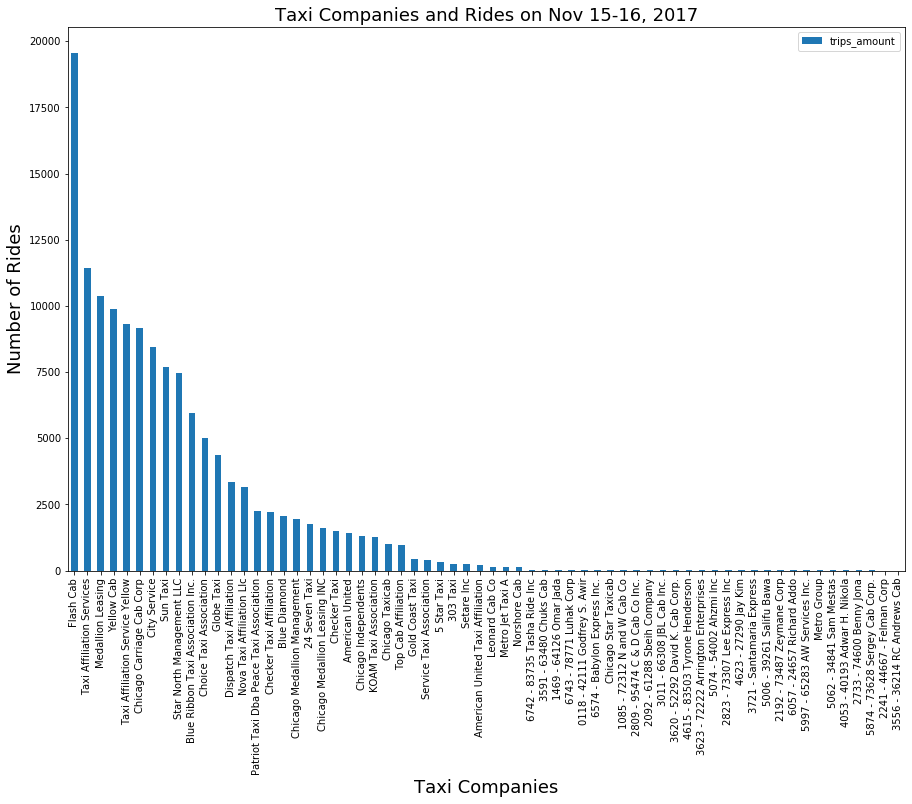

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot all taxi companies
taxi_ride = company_tripamt_df.sort_values(by='trips_amount',ascending=False)
print(taxi_ride)

ax = taxi_ride.plot(kind='bar', x='company_name', y='trips_amount',figsize=(15,10))

ax.set_title("Taxi Companies and Rides on Nov 15-16, 2017", fontsize=18)
ax.set_ylabel("Number of Rides", fontsize=18);
ax.set_xlabel("Taxi Companies", fontsize=18);

#### Conclusion:
Flash Cab was the most popular one on November 15-16 2017.



<div class="alert alert-block alert-success">
<b>Success:</b> Great that you;ve sorted companies before visualizing.
</div>

### Top 10 neighborhood by number of dropoffs

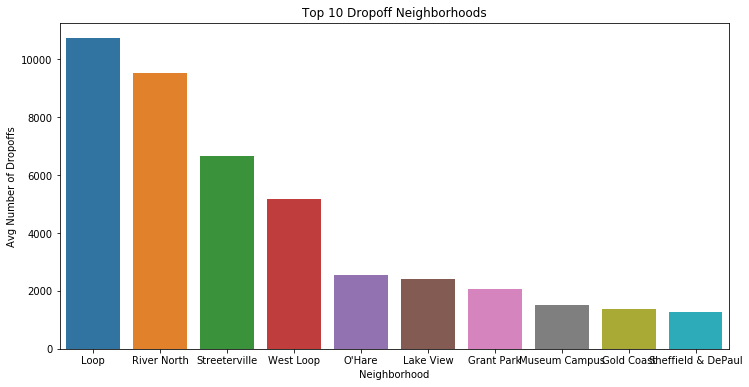

In [20]:
top10_neighborhoods_dropoffs = dropoff_location_avgtrip_df.sort_values(by='average_trips',ascending=False).round(decimals=2).head(10)
#print(top10_neighborhoods_dropoffs)

import seaborn as sns

# Figure Size
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

sns.barplot(x=top10_neighborhoods_dropoffs.dropoff_location_name, y='average_trips'
            , data=top10_neighborhoods_dropoffs
            , ax=ax
            , capsize=12)

plt.ylabel('Avg Number of Dropoffs')
plt.xlabel('Neighborhood')
plt.title('Top 10 Dropoff Neighborhoods')
          
plt.show()



#### Conclusion:
Loop, River North and Streeterville were mostly neighborhoods by average number of rides that ended in each neighborhood in November 2017.

<div class="alert alert-block alert-success">
<b>Success:</b> Great!
</div>

### Step 5. Test the following hypotheses:

/datasets/project_sql_result_07.csv — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:

- start_ts
   - pickup date and time
- weather_conditions
- weather conditions at the moment the ride started
- duration_seconds
- ride duration in seconds
- Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
Decide where to set the significance level (alpha) on your own.
Explain:
how you formed the null and alternative hypotheses
what criterion you used to test the hypotheses and why


In [21]:
# Read data from file
Weather_conditions_df = pd.read_csv('/datasets/project_sql_result_07.csv')

# preview the loaded data to check structure of dataset
Weather_conditions_df.info()

## checking missing values
Weather_conditions_df.isna().sum()

# Return the top n- rows of dataframe
Weather_conditions_df.head(5)

Weather_conditions_df.weather_conditions.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


array(['Good', 'Bad'], dtype=object)

In [22]:
# changing data type of the dataset
Weather_conditions_df['start_ts'] = pd.to_datetime(Weather_conditions_df['start_ts'])

In [23]:
### Test whether the average duration of rides from the Loop to 
#O'Hare International Airport changes on rainy Saturdays

# rainy Saturday data 
rainy_rides = Weather_conditions_df[Weather_conditions_df['weather_conditions']=='Bad']

# non-rainy data
nonrainy_rides = Weather_conditions_df[Weather_conditions_df['weather_conditions']=='Good']

# calculate average duration of non rainy and rainy rides
avg_nonrainy_rides = nonrainy_rides['duration_seconds'].mean()
print('The average duration of non-rainy Saturday rides is ' + str(avg_nonrainy_rides/60))

avg_rainy_rides = rainy_rides['duration_seconds'].mean()
print('The average duration of rainy Saturday rides  is ' + str(avg_rainy_rides/60))

# perform a t-test
results = st.ttest_ind(rainy_rides['duration_seconds'], nonrainy_rides['duration_seconds'], equal_var=False)
p_value = results.pvalue

# critical statistical significance level
alpha = 0.05

print('p-value: ', results.pvalue)

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

The average duration of non-rainy Saturday rides is 33.327927927927924
The average duration of rainy Saturday rides  is 40.45342592592593
p-value:  6.738994326108734e-12
We reject the null hypothesis


### Conclusion:
We tested the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. We started with two independent samples t-test to compare the average duration of two rides group (bad and good weather). We performed t-tests with the two hypotheses.

- Null hypothesis (H₀): the average duration of rides from the Loop to
O'Hare International Airport doesn't change on rainy Saturdays

- Alternative hypothesis(H₁): the average duration of rides from the Loop to
O'Hare International Airport changes on rainy Saturdays

For this, we will use an alpha of 0.05, which means that only in 5% of cases will we reject the null hypothesis when it is true.

We used a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another.

This result implies that the average duration of rides from the Loop to
O'Hare International Airport changes on rainy Saturdays.
The average duration of rainy Saturday rides is 40.45 mins whereas the average duration of non-rainy Saturday rides is 33.33 mins. There are 7 mins difference between the two samples. Based on that, we can conclude that weather does impact on ride frequencies.

<div class="alert alert-block alert-success">
<b>Success:</b> Both null and alternative hypotheses were formulated correctly. Testing was done in the right way too.
</div>

### Overall Conclusion:
The goal of this project is to analyze the impact of weather on ride frequency. 

To do that, we first imported files CSV files and studied the contents. Changed data types of columns where required and checked for duplicate and missing values in the datasets. The presence of any of these, will not give us an accurate result so need to be taken care of beforehand. 

We identified the top 10 neighborhoods in terms of drop-offs. We also plotted graphs for taxi companies and the number of rides, top 10 neighborhoods by a number of dropoffs. 

We tested the hypothesis:"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." Based on the test we can conclude that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. 

Hence, weather impacts on ride frequencies.

<div class="alert alert-block alert-success">
<b>Success:</b> Glad to see detailed overall conclusion at the end of the project.
</div>